<a href="https://colab.research.google.com/github/YooNayoung/ESAA/blob/main/0321ch4.%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 선형 회귀

### 4.1.1 정규방정식
비용함수를 최소화 하는 theta값을 찾기 위한 해석적인 방법

In [2]:
# 무작위로 생성한 선형 데이터셋
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
# 정규방정식을 이용해 theta_hat 계산
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.68403054],
       [3.26098423]])

In [6]:
# theta_hat을 사용해 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.68403054],
       [10.20599899]])

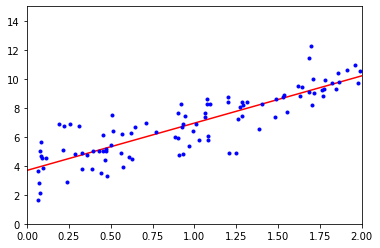

In [7]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [17]:
# 사이킷런에서 선형회귀 수행
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.51097771]), array([[1.08486016]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.70086493],
       [10.18138026]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.70086493],
       [3.24025766]])

- 이 함수는 theta_hat = X(+)y을 계산. 
- X(+)는 X의 유사역행렬(pseudoinverse). 
- np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있음.

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.70086493],
       [3.24025766]])

### 4.1.2 경사복잡도
- 정규방정식은 X^(T)X의 역행렬을 계산. 
- 역행렬을 계산하는 계산복잡도는 일반적으로 O(n^(2.4)) ~ O(n^(3)) 사이. 
- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^(2))

# 4.2 경사하강법
- 최적화 알고리즘. 비용함수를 최소화하기 위해 반복해서 파라미터 조정.
- 중요한 파라미터는 스텝의 크기인 학습율(learning rate)

### 4.2.1 배치 경사 하강법
- 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산
- 매우 큰 훈련 세트에서는 아주 느림

In [13]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[3.70086493],
       [3.24025766]])

### 4.2.2 확률적 경사 하강법
- 배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산하기 때문에 훈련 세트가 커지면 매우 느려지는 문제점 있음
- 반면 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그에 대한 그래디언트 계산 
- 한 번에 하나의 샘플을 처리하기 때문에 훨씬 빠름(매우 큰 훈련세트도 가능)
- but, 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정
- so, 학습 스케줄 함수를 이용해 학습률을 점진적으로 감소시킴

In [15]:
# 학습 스케줄을 사용한 확률적 경사 하강법 
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[3.71119673],
       [3.24768382]])

### 4.2.3 미니배치 경사 하강법
- 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트 계산
- 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상

# 4.3 다항회귀
- 선형 모델에 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것


In [25]:
# 2차방정식으로 비선형 데이터 생성
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [26]:
# 사이킷런의 PolynomialFeatures를 사용해 각 특성을 제곱하여 새로운 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [27]:
# X_poly : 원래 특성 X와 이 특성의 제곱을 포함
X_poly[0]

array([-0.75275929,  0.56664654])

In [28]:
# 확장된 훈련 데이터에 LinearRegression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# 4.4 학습곡선
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
- 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨 

In [29]:
# 학습 곡선을 그리는 함수 정의
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

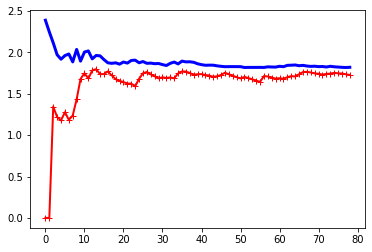

In [30]:
# 과소적합된 모델 
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

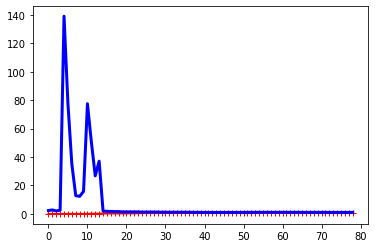

In [31]:
# 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선 
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 곡선 사이에 공간 존재. 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻으로 과대적합 모델의 특징
- but, 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

# 4.5 규제가 있는 선형 모델
- 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것
- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제 가함

### 4.5.1 릿지 회귀
- 규제항이 비용함수에 추가됨 (훈련하는 동안만)
- alpha : 모델을 얼마나 많이 규제할지 조절 (0이면 선형회귀)

In [33]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [34]:
# 정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [36]:
# 확률적 경사 하강법을 사용한 릿지 회귀
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

### 4.5.2 라쏘 회귀
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만 l2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1 노름 사용
- 특징은 덜 중요한 특성의 가중치를 제거한다는 점(희소 모델을 만듬)
- 경사 하강법 적용을 위해 서브그레이디언트 벡터 사용 

In [37]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### 4.5.3 엘라스틱넷
- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 라쏘 규제항을 단순히 더한 것이고 혼합 비율 r로 조절 (0이면 릿지, 1이면 라쏘와 같아짐)

In [38]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### 4.5.4 조기 종료 (규제의 색다른 방법)
- 검증 에러가 최솟값에 도달하면 바로 훈련 중지 

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [42]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

# 4.6 로지스틱 회귀

### 4.6.1 확률 추정
- 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산
- 결괏값의 로지스틱을 출력
- 로지스틱 : 0 ~ 1 사이의 값을 출력하는 시그모이드 함수

### 4.6.2 훈련과 비용 함수
- 훈련의 목적: y=1에 대해서는 높은 확률을 추정하고 y=0에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 theta를 찾는 것
- 비용 함수: 모든 훈련 샘플의 비용을 평균한 것 -> 로그 손실

### 4.6.3 결정 경계

In [43]:
# iris 데이터 로드 
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [44]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

In [45]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

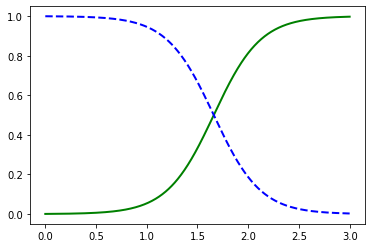

In [46]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산 
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [47]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀

In [48]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [49]:
softmax_reg.predict([[5, 2]])

array([2])

In [50]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])